# Описание проекта

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Перед нами данные до 2016 года. 
Необходимо исследовать данные и найти:
1. Предпочтения покупателей в локациях Северная Америка, Европа и Япония.
2. Лидеров рынка и типы игр в разных локациях.
3. Закономерности и проверить гипотезы.

В финале сделать прогноз продаж на 2017



# Шаг 1. Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns


In [2]:
data = pd.read_csv('C:/Users/MaCSC LLC/datasets/games.csv')
display(data.head(5))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
print(data.isnull().sum())
print(' ')
print('Полных дубликатов:', data.duplicated().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64
 
Полных дубликатов: 0


В файле много пропусков, по позициям  Critic_Score,User_Score,Rating пропусков 40-50%. Год в формате float.

In [4]:
print(data.isnull().sum()) 
print(' ') 
print('Полных дубликатов:', data.duplicated().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64
 
Полных дубликатов: 0


# Шаг 2. Подготавливаем данные

In [5]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
display(data.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Не которые пишут длинный словарь для замены колонок.</font>

In [6]:
# смотрим пропуска в name
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# смотрим пропуска в genre
data[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# смотрим пропуска в year_of_release
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
# удаляем пропуски, которые нельзя ничем заменить
data = data.dropna(subset=['name','genre','year_of_release'])

In [10]:
print(data.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64


In [11]:
# меняем тип данных на целочистенный
data['year_of_release'] = data['year_of_release'].astype('int')

In [12]:
# в столбце user_score присутствует значение 'tbd'
data['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
print('Количество tbd:',data[data['user_score'] == 'tbd']['user_score'].count())


Количество tbd: 2376


In [14]:
# Удалять строки с tbd не стоит, т.к. это 15% наших данных. 
# Заменит tbd на Nan, а затем на -5
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 
data['user_score'] = data['user_score'].fillna(-5)
# В оставшихся стоблах заменим Nan на -5
data['critic_score'] = data['critic_score'].fillna(-5)
data['rating'] = data['rating'].fillna('Not data')

print(data.isnull().sum())


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Обработали пропуски. Теперь можно приступать к анализу

In [15]:
# меняем тип данных на целочистенный
data['critic_score'] = data['critic_score'].astype('int')

In [16]:
print(data.isnull().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


In [18]:
# добавим столбец суммарные продажи
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [19]:
# любуемся что получилось
display(data.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-5,-5.0,Not data,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-5,-5.0,Not data,31.38


In [20]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

# Шаг 3. Проводим исследовательский анализ данных

Text(0, 0.5, 'Количество игр')

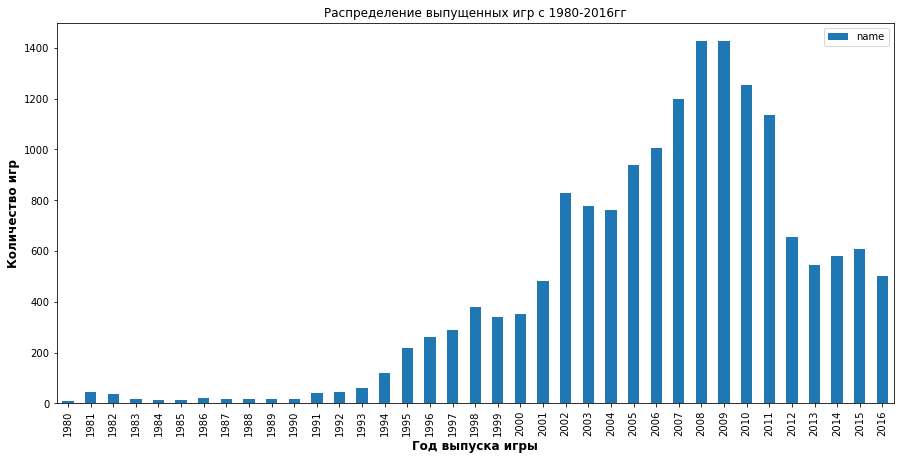

In [21]:
# Выпуск игр по годам
data_yaer_of_release = data.pivot_table(index = 'year_of_release',aggfunc={'name':'count'})
#print(data_yaer_of_release)
data_yaer_of_release.plot(y='name', kind='bar', figsize=(15, 7))
plt.title(label='Распределение выпущенных игр с 1980-2016гг')
plt.xlabel("Год выпуска игры", fontsize=12,fontweight="bold")
plt.ylabel("Количество игр",fontsize=12, fontweight="bold")

In [22]:
# ТОП-5 по продажам
data_TOP_5_platform = data.pivot_table(index = ['platform'], aggfunc={'total_sales':sum}).nlargest(5, columns='total_sales')
data_TOP_5_platform


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


In [23]:
# Распределение продаж по платформам
change_platform_years = data.query('platform in @data_TOP_5_platform.index')
change_platform_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,-5,-5.0,Not data,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,-5,-5.0,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-5,-5.0,Not data,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-5,-5.0,Not data,0.01


In [24]:
# перечень платформ из ТОП-5 
platform_unique_list = change_platform_years['platform'].unique()
platform_unique_list

array(['Wii', 'DS', 'X360', 'PS3', 'PS2'], dtype=object)

In [25]:
# список с диапазоном по годам
years_list = [i for i in range(1995, 2017)]

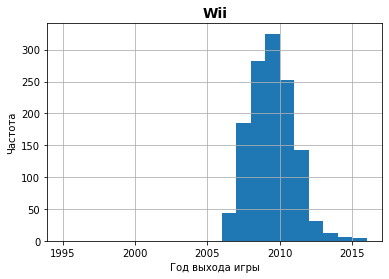

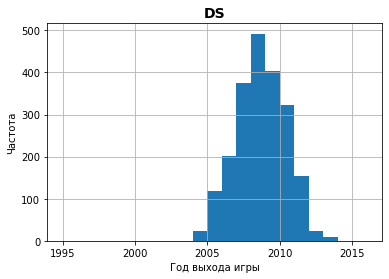

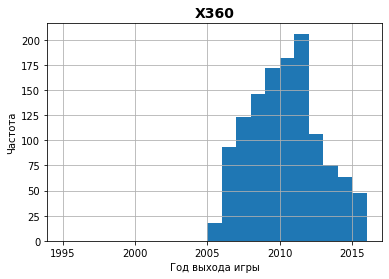

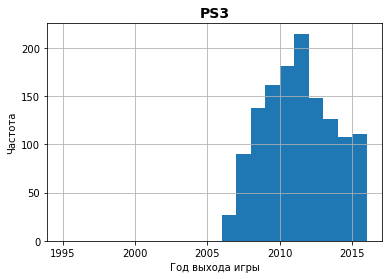

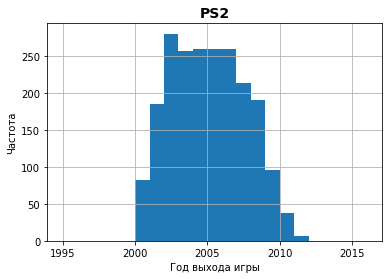

In [26]:
# строим гистограммы продаж для ТОП-5 платформ по продажам:

for j in range(0, len(platform_unique_list)):
    change_platform_years[change_platform_years['platform']==platform_unique_list[j]]\
    .plot(kind='hist', bins=years_list, legend=False, grid=True)
    
    plt.title(label=platform_unique_list[j], fontsize=14, fontweight="bold")
    plt.xlabel("Год выхода игры")
    plt.ylabel("Частота")

In [27]:
# Из графиков следует, что продажи платформы живут в среднем 10-11 лет, графики близкт к нормальному распределению,
# рост продаж происходит быстрее, чем дальшейший спад. Это актуально из выборки 5 платформ, с ниобольшили продажами

Актуальный период беру 2012-2016гг, из диаграммы количества выпущенных игр. В эти года видно плато с лавным снижением по выпуску новых игр, соответственено считаю, что прогноз на 2017 год надо планировать исходя их данных за 2012-2016гг. 


In [28]:
# Ранее я указал, что время существования платформ ТОП-5 составляет 10-11лет. 
# А кокае среднее вреся существование по всем платформам?
platform_unique = data['platform'].unique()
print('Всего платформ:',len(platform_unique))

Всего платформ: 31


In [29]:
# Итого, у нас 31 платформа. Считаем среднее существование платформы
platform_time = data.pivot_table(index='platform', values='year_of_release', aggfunc=[min, max])
platform_time.columns = ['start', 'end']
platform_time['duration'] = platform_time['end'] - platform_time['start']
# исключим платформы до 2000г и выведем результат
platform_time[platform_time['start']>2000]

# результат не объективен, т.к. мы не учли платформы которые еще продаются


,start,end,duration
platform,,,
3DS,2011,2016,5
GC,2001,2007,6
PS3,2006,2016,10
PS4,2013,2016,3
PSP,2004,2015,11
PSV,2011,2016,5
Wii,2006,2016,10
WiiU,2012,2016,4
X360,2005,2016,11


получили время существования платформ, но теперь непонятно, какие платформы надо брать для анализа. Для этого построим графики по всем платформам, и выберем те, у которых продажи на 2016год еще были.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


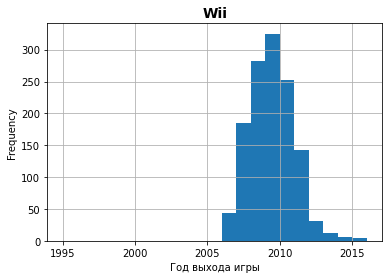

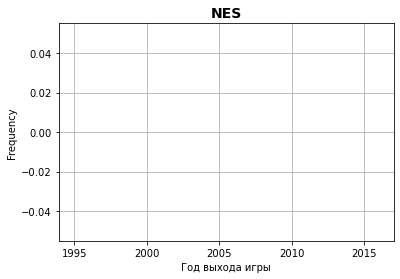

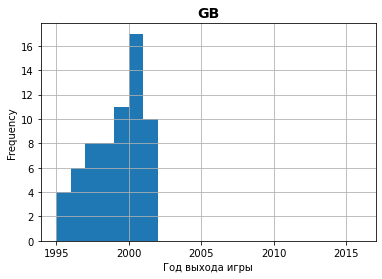

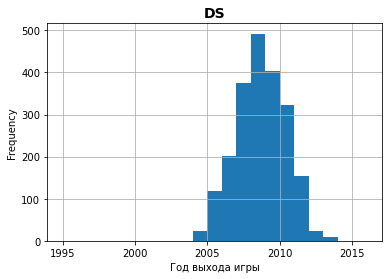

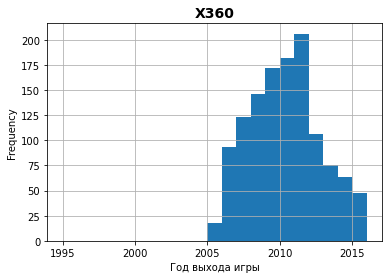

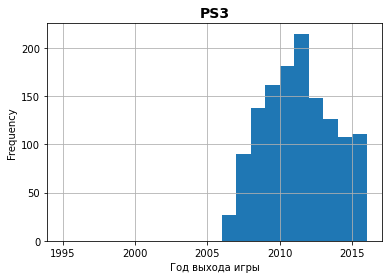

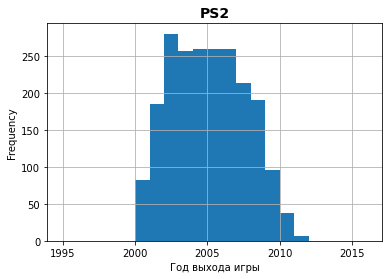

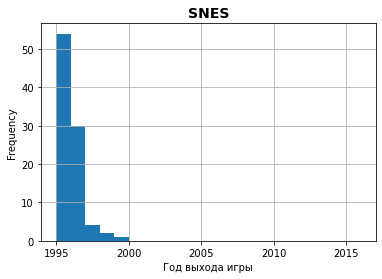

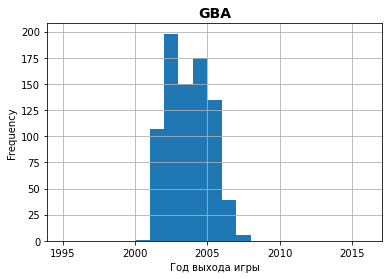

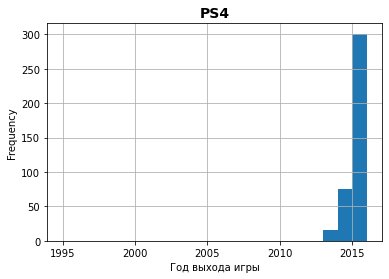

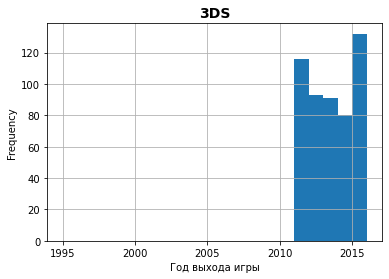

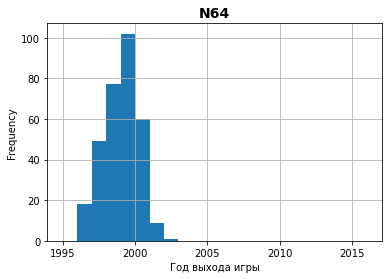

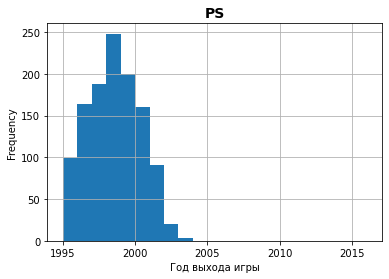

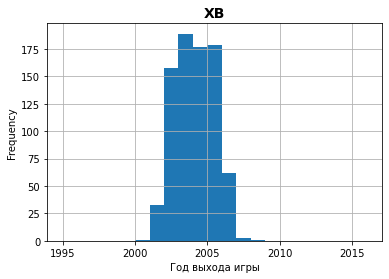

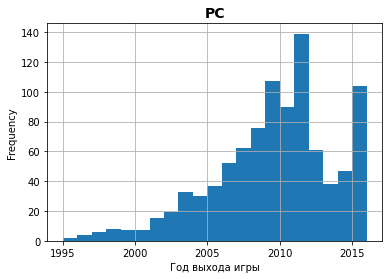

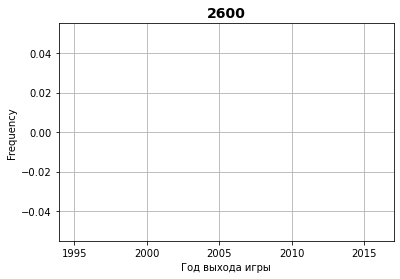

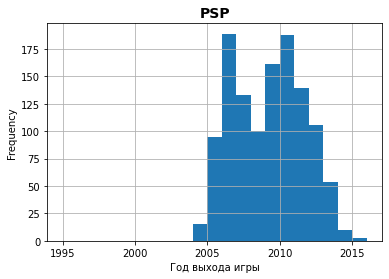

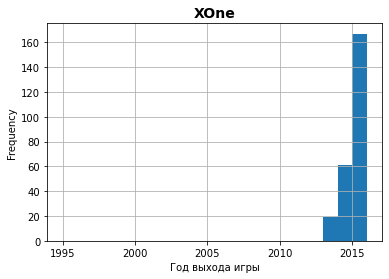

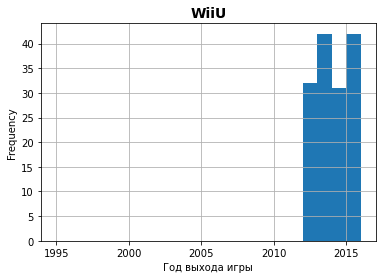

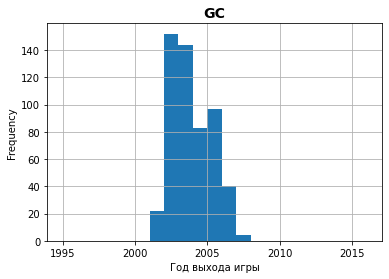

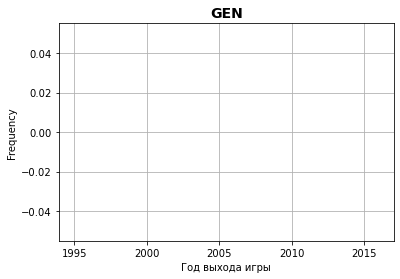

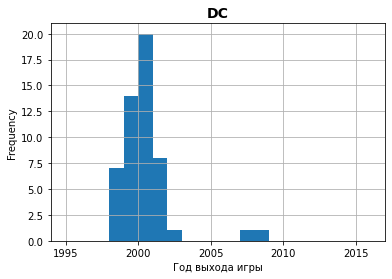

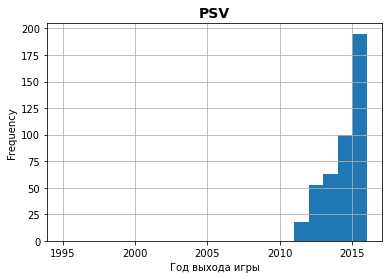

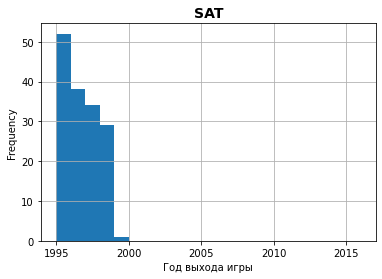

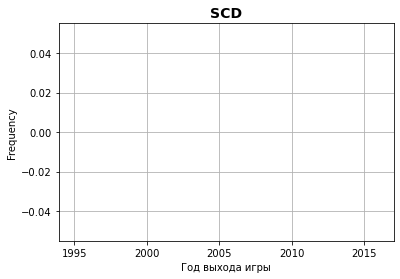

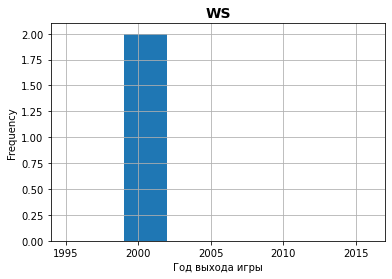

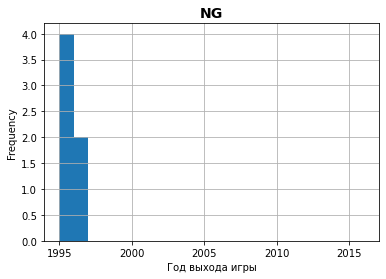

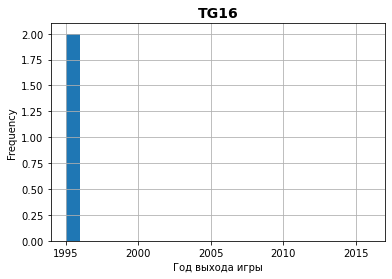

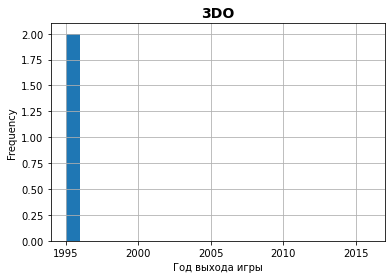

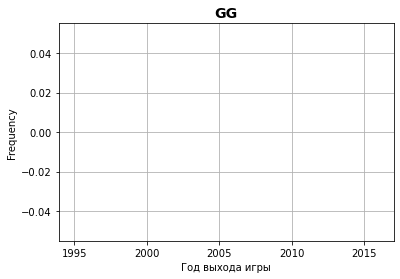

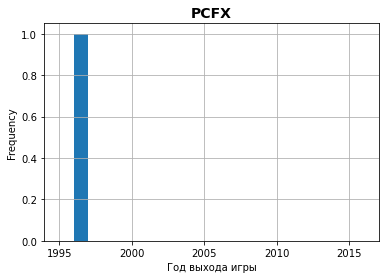

In [30]:
# распределения продаж для всех платформ по всем годам. Будем отбирать платформы, которые еще продаются.
for i in range(0, len(platform_unique)):
    data[data['platform']==platform_unique[i]].plot(kind='hist', bins=years_list, legend=False, grid=True)
    plt.title(label=platform_unique[i], fontsize=14, fontweight="bold")
    plt.xlabel("Год выхода игры")



In [31]:
# Из графиков выбираем платформы которые еще продаюся  -X360, PS3, PS4, 3DS, PC, XOne, WiiU, PSV. 
platform_to_sale = ['X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV']

Платформы с ростом продаж PSV, XOne, PS4                                                        
Платформы с падением продаж, или пратформы с отсутствием роста продаж - WiiU, PC, 3DS, PS3, X360

In [32]:
# Выберем потенциально прибыльные платформы (посчитаем продажи платформ из списка platform_to_sale)
data_platform_to_sale = data.pivot_table(index = ['platform'], aggfunc={'total_sales':sum}).query('platform in @platform_to_sale')
data_platform_to_sale = data_platform_to_sale.nlargest(10, columns='total_sales')
data_platform_to_sale

,total_sales
platform,
X360,961.24
PS3,931.34
PS4,314.14
3DS,257.81
PC,255.76
XOne,159.32
WiiU,82.19
PSV,53.81


Как ранее увидели, растущие продажи у PSV, XOne, PS4. Но в лидера по продажам X360, PS3 чьи продажи падают. Можно предположить что лидером рынка на 2017год станет PS4 (XOne и PSV хоть и растут, но кратность в отставании объема продаж до PS4 не дадут им занять лидерскую позицию.

In [33]:
# Расчитаем среднее время существования платформ (исключаем, те, которые еще продаются - platform_to_sale)
platform_filter_lifetime = (platform_time.reset_index().query('platform not in @platform_to_sale'))
platform_filter_lifetime


,platform,start,end,duration
0,2600,1980,1989,9
1,3DO,1994,1995,1
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0
10,N64,1996,2002,6


In [34]:
median_duratiom = platform_filter_lifetime['duration'].median()
print ('Медианное время существование продаж платформ:', median_duratiom, 'лет')

Медианное время существование продаж платформ: 7.0 лет


Вот теперь гораздо информативнее, ТОП-5 лидеров продаж существовали по 10..11 лет, а медианное всего 7 лет. 

In [35]:
# Строим график ящик с усами c 2012-2016
#actual_years = []
#for i in range(2012, 2016):
#    actual_years.append(i)
# Выполним выборку
#data_actual = data.query('year_of_release in @actual_years')
data_actual = data.query('2012<=year_of_release<=2016')
print(display(data_actual.head(5)))
print(len(data_actual))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-5,-5.0,Not data,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-5,-5.0,Not data,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


None
2886


Text(0, 0.5, 'Платформы')

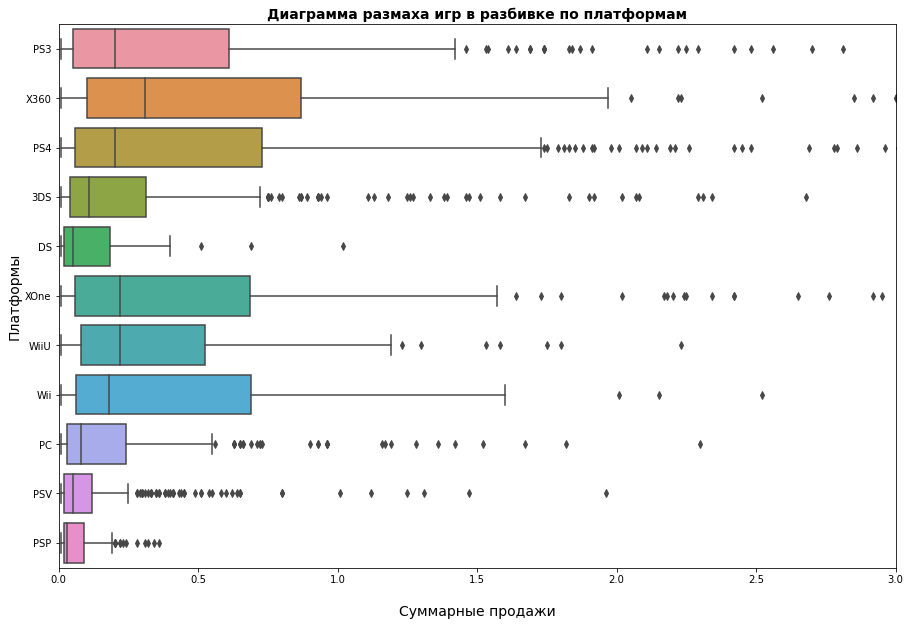

In [36]:
# Построим график
plt.figure(figsize=(15,10))
sns.boxplot(data=data_actual, x='total_sales', y='platform')
plt.xlim(0, 3)
plt.title(label='Диаграмма размаха игр в разбивке по платформам', fontsize=14,fontweight="bold")
plt.xlabel("\nСуммарные продажи", fontsize=14)
plt.ylabel("Платформы", fontsize=14)

На графике можно понять, была ли популярна платформа в интересующий нас отрезок времени. Определить можно по объему продаж, входящему в межквартильный размах и медиане, чем они выше тем популярнее платформа.

Смотрим, как влияют продаже внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграму рассеивания, и посчитаем коллеряцию между отзывами и продажами.

Text(0, 0.5, 'Платформы')

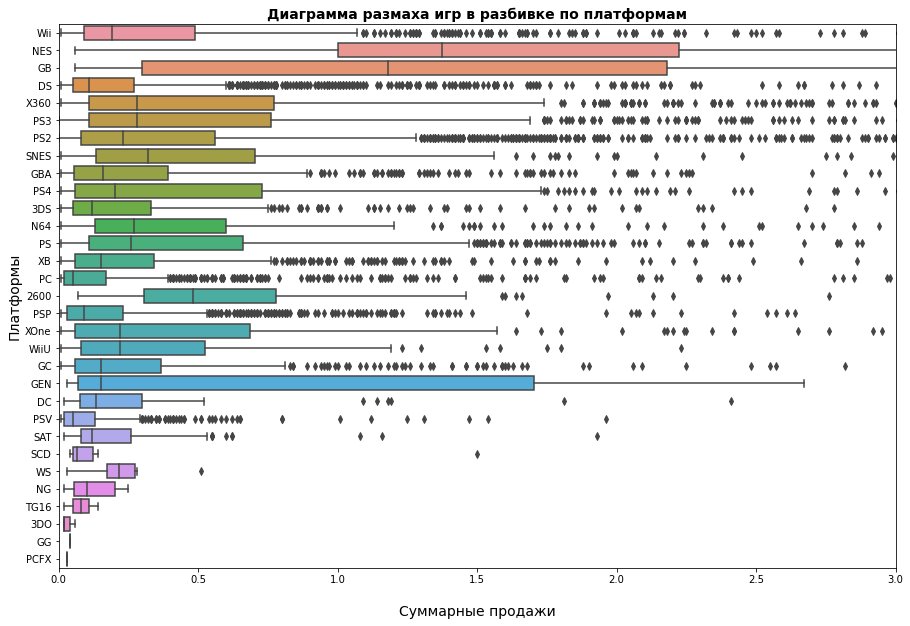

In [37]:
# Построим график со всеми данными
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x='total_sales', y='platform')
plt.xlim(0, 3)
plt.title(label='Диаграмма размаха игр в разбивке по платформам', fontsize=14,fontweight="bold")
plt.xlabel("\nСуммарные продажи", fontsize=14)
plt.ylabel("Платформы", fontsize=14)

In [38]:
# В этой диаграмме ТОП по выбросам у PS2 и DS

Text(0, 0.5, 'Платформы')

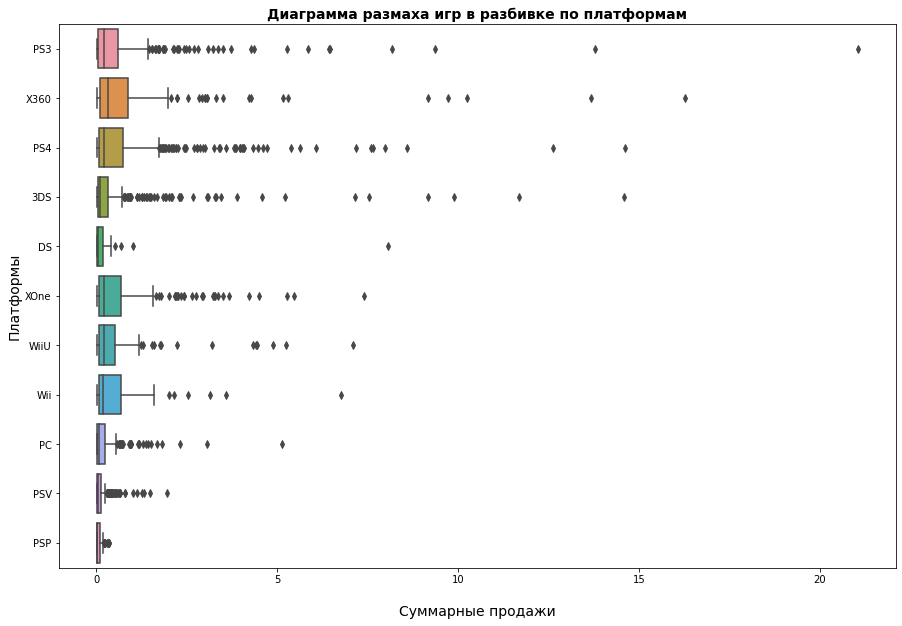

In [39]:
# Построим график
plt.figure(figsize=(15,10))
sns.boxplot(data=data_actual, x='total_sales', y='platform')
plt.title(label='Диаграмма размаха игр в разбивке по платформам', fontsize=14,fontweight="bold")
plt.xlabel("\nСуммарные продажи", fontsize=14)
plt.ylabel("Платформы", fontsize=14)

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.


In [40]:
# отфильтруем наши заглушки в стобще critic_score и user_score
display(data.head(5))
print('Первоначальная длина датасета:', len(data_actual))
data_actual_critic = data_actual[data_actual['critic_score']>0]
print('Без заглушек в графе critic_score:',len(data_actual_critic))
data_actual_user_score = data_actual[data_actual['user_score']>0]
print('Без заглушек в графе critic_score и user_score:',len(data_actual_user_score))




,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-5,-5.0,Not data,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-5,-5.0,Not data,31.38


Первоначальная длина датасета: 2886
Без заглушек в графе critic_score: 1312
Без заглушек в графе critic_score и user_score: 1531


In [41]:
# Комментарий ревьюера 3
temp = data.query('2012<=year_of_release<=2016').copy()
print('Полный датасет актуального периода', len(temp))
print('Датасет актуального периода без заглушек отзывов критиков', len(temp[temp['critic_score']>0]))
print('Датасет актуального периода без заглушек отзывов пользователей', len(temp[temp['user_score']>0]))
print('Датасет актуального периода без заглушек отзывов пользователей и критиков', len(data_actual))

Полный датасет актуального периода 2886
Датасет актуального периода без заглушек отзывов критиков 1312
Датасет актуального периода без заглушек отзывов пользователей 1531
Датасет актуального периода без заглушек отзывов пользователей и критиков 2886


In [42]:
# Полный датасет актуального периода 2886
# Датасет актуального периода без заглушек отзывов критиков 1312
# Датасет актуального периода без заглушек отзывов пользователей 1531
# Датасет актуального периода без заглушек отзывов пользователей и критиков 1297

зависимости продаж от оценок расположим рядом слева и справа соответственно
platform_to_sale - платформе в продаже
data_actual_critic - отфильтрованные данные по  critic_score > 0
data_actual_user_score - отфильтрованные данные по  user_score > 0

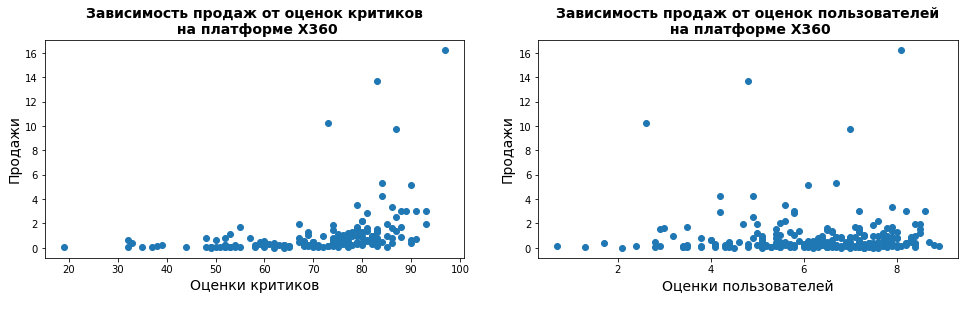

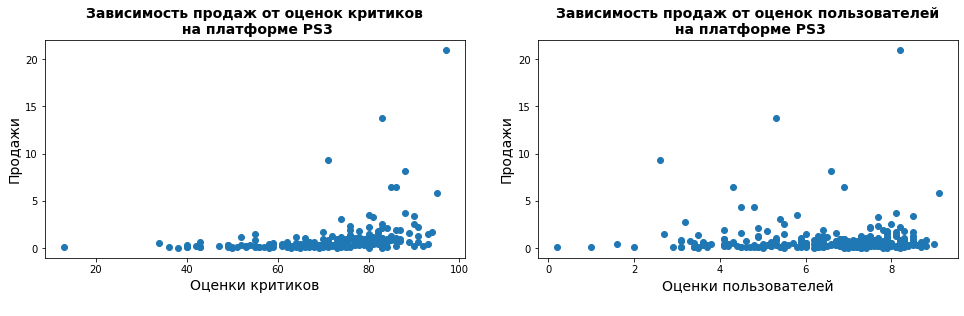

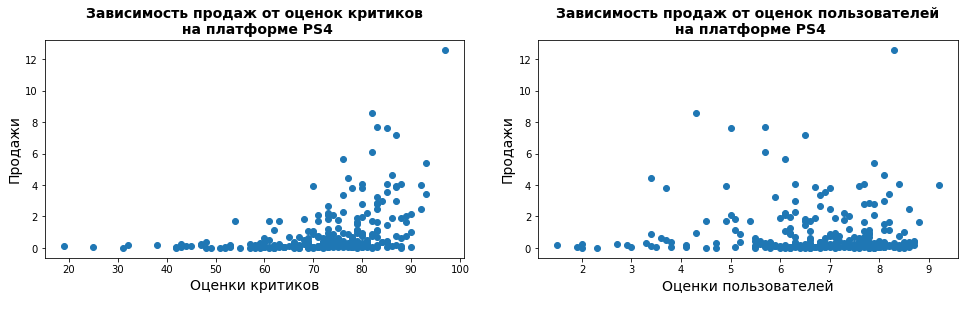

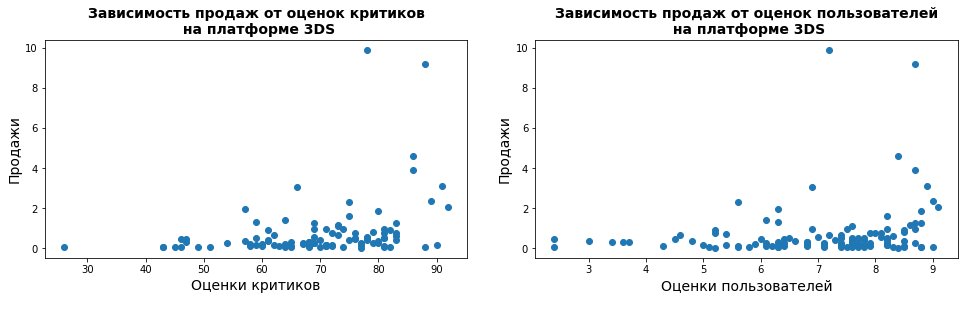

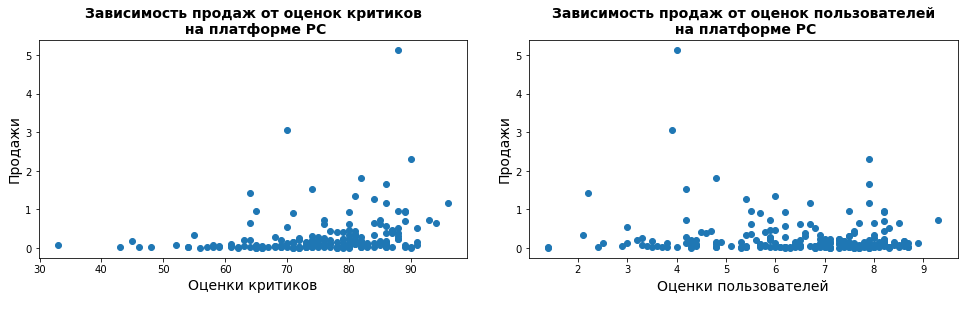

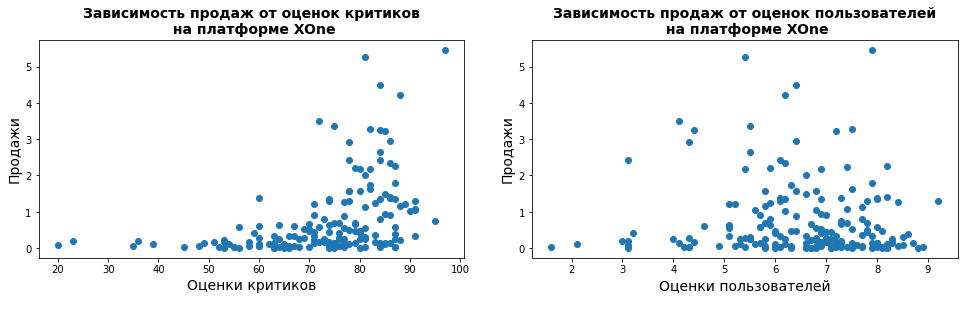

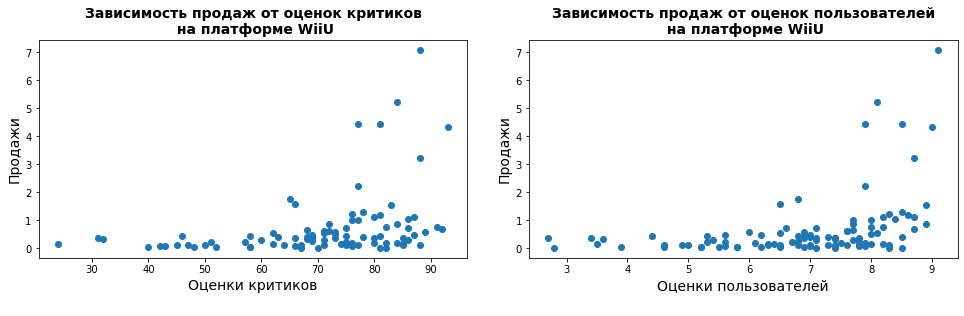

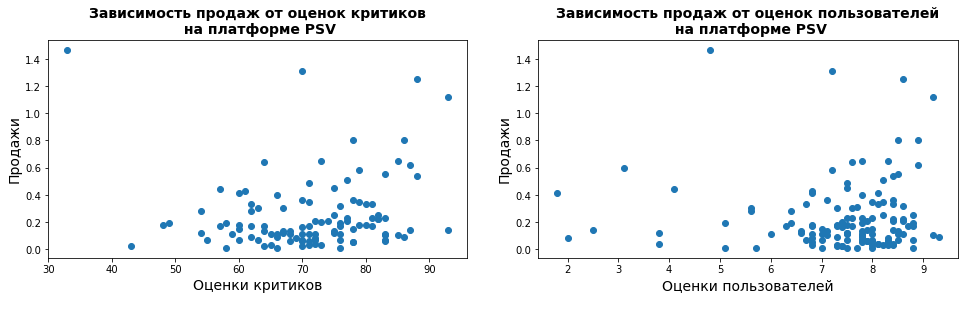

In [43]:
data_NA_EU_JP = data_actual

for name_platform in platform_to_sale:
    x_critic = data_actual_critic[data_actual_critic['platform']==name_platform]['critic_score']
    y_critic = data_actual_critic[data_actual_critic['platform']==name_platform]['total_sales']
    
    x_user = data_actual_user_score[data_actual_user_score['platform']==name_platform]['user_score']
    y_user = data_actual_user_score[data_actual_user_score['platform']==name_platform]['total_sales']
    
    
    fig = plt.figure(figsize=(13.5, 4.5))
    ax1 = fig.add_subplot(121)
    ax1.scatter(x_critic, y_critic)
    ax1.set_title('Зависимость продаж от оценок критиков\n на платформе '+name_platform, fontsize=14, fontweight="bold")
    ax1.set_xlabel('Оценки критиков\n', fontsize=14)
    ax1.set_ylabel('Продажи', fontsize=14)
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(x_user, y_user)
    ax2.set_title('Зависимость продаж от оценок пользователей\n на платформе '+name_platform, fontsize=14, fontweight="bold")
    ax2.set_xlabel('Оценки пользователей\n', fontsize=14)
    ax2.set_ylabel('Продажи', fontsize=14)
    
    plt.tight_layout(w_pad=3)

In [44]:
# Продажи начинаются при оценке критиков 40. А активный продажи при оченки 60 и более.
# Продажи начинаются при оценке пользователей от 2. А активные продажи при оченки 4 и более.

In [45]:
# Расчитаем коэффициент корреляции

In [46]:
print('Коэффициент корреляции')
print('___________________________________')

for name_platform in platform_to_sale:
    print('Наименование платформы', name_platform)
    print ('продажи и оценки критиков', round((data_actual_critic[data_actual_critic['platform']==name_platform]['total_sales'].corr(data_actual_critic[data_actual_critic['platform']==name_platform]['critic_score'])),2))
    print ('продажи и оценки пользователей', round((data_actual_user_score[data_actual_user_score['platform']==name_platform]['total_sales'].corr(data_actual_user_score[data_actual_user_score['platform']==name_platform]['user_score'])),2)) 
    print('___________________________________')


Коэффициент корреляции
___________________________________
Наименование платформы X360
продажи и оценки критиков 0.36
продажи и оценки пользователей 0.01
___________________________________
Наименование платформы PS3
продажи и оценки критиков 0.33
продажи и оценки пользователей -0.01
___________________________________
Наименование платформы PS4
продажи и оценки критиков 0.41
продажи и оценки пользователей -0.03
___________________________________
Наименование платформы 3DS
продажи и оценки критиков 0.32
продажи и оценки пользователей 0.2
___________________________________
Наименование платформы PC
продажи и оценки критиков 0.24
продажи и оценки пользователей -0.12
___________________________________
Наименование платформы XOne
продажи и оценки критиков 0.42
продажи и оценки пользователей -0.07
___________________________________
Наименование платформы WiiU
продажи и оценки критиков 0.35
продажи и оценки пользователей 0.4
___________________________________
Наименование платформы PSV


Корреляцич показывает, что оценки критиков сильнее влияют на продажи, чем оценки пользователей. 
А у платформ 3DS и PSV, ситуация другая, влияние на продажи оценок критиков и пользователей одинаковое. А далее мы увидим, что платформа 3DS занимет 50% рынка Японии, где влияние оценок минимально.

Строим столбчатый график выручки по жанрам игр (за все периоды) 

Text(0, 0.5, 'Выручка')

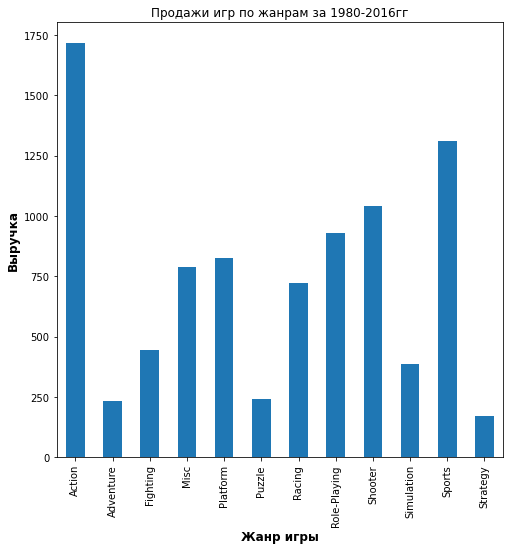

In [47]:
# строим гистограмму выручки игр по жанрам (за все периоды)
data_genre_1 = data.pivot_table(index = ['genre'], aggfunc={'total_sales':sum})
data_genre_1.plot(y = 'total_sales', kind='bar', figsize=(8, 8), legend=False)
plt.title(label='Продажи игр по жанрам за 1980-2016гг')
plt.xlabel("Жанр игры", fontsize=12,fontweight="bold")
plt.ylabel("Выручка",fontsize=12, fontweight="bold")

Text(0, 0.5, 'Медиана')

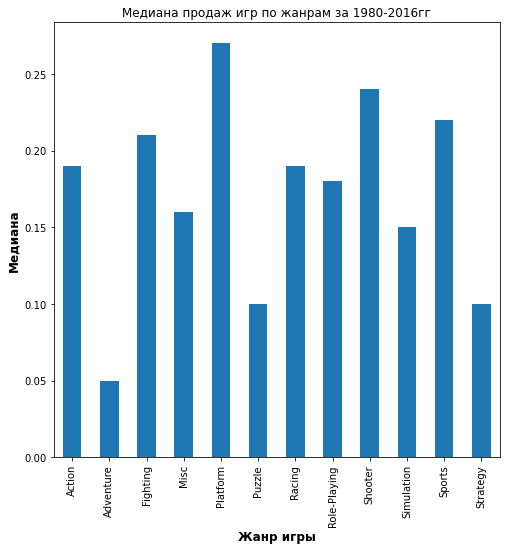

In [48]:
# строим медиану выручки игр по жанрам (за все периоды)
data_genre_median = pd.pivot_table(data, index = ['genre'], aggfunc={'total_sales':np.median})
data_genre_median.plot(y = 'total_sales', kind='bar', figsize=(8, 8), legend=False)
plt.title(label='Медиана продаж игр по жанрам за 1980-2016гг')
plt.xlabel("Жанр игры", fontsize=12,fontweight="bold")
plt.ylabel("Медиана",fontsize=12, fontweight="bold")

Text(0, 0.5, 'Количество')

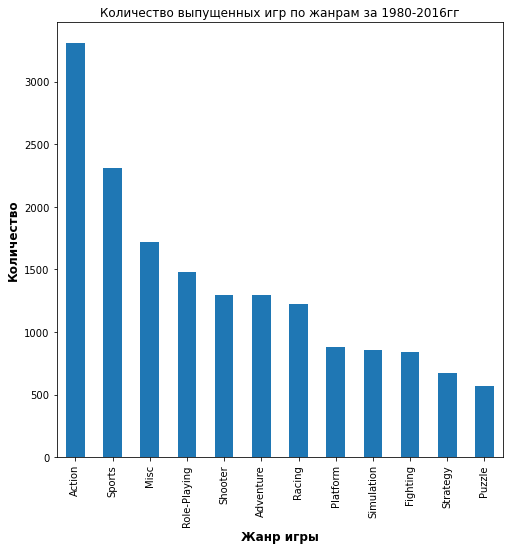

In [49]:
# и для наглядности довавим количество проданных игр по жанрам (за все периоды)
data_genre_count = data['genre'].value_counts()
data_genre_count.plot(kind='bar', figsize=(8, 8), legend=False)
plt.title(label='Количество выпущенных игр по жанрам за 1980-2016гг')
plt.xlabel("Жанр игры", fontsize=12,fontweight="bold")
plt.ylabel("Количество",fontsize=12, fontweight="bold")

Вывод: Самой дорогой тип игры - жанр Platform, но самый массовый по выручке и по количеству игр (подозреваю, что и самый маржинальный) - Action. В вот аутсайдер - Adventure, выручка низкая, меданная выручка низкая, но количетсов выпущенных игр - на среднем уровне. Нам точно не стоимт делать игры жанра Adventure

# Шаг 4. Составляем портрет пользователя каждого региона

А теперь определим портрет пользователя для каждого региона (NA, EU, JP) начиная с 2012г
Суммарный портрет (по всем регионам)

          total_sales
platform             
PS4            314.14
PS3            288.79
X360           236.54
3DS            194.61
XOne           159.32


<AxesSubplot:ylabel='total_sales'>

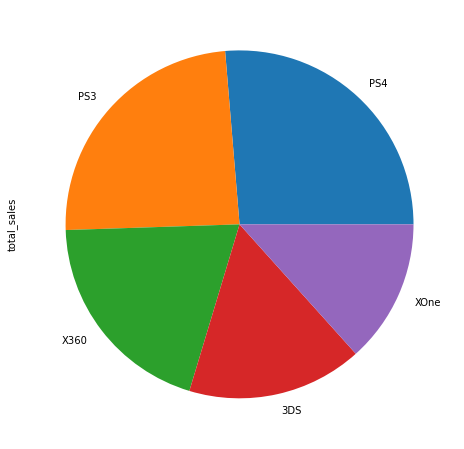

In [50]:
data_NA_EU_JP = data[data['year_of_release']>=2012]
data_TOP_5_platform = data_NA_EU_JP.pivot_table(index = ['platform'], aggfunc={'total_sales':sum}).nlargest(5, columns='total_sales')
print(data_TOP_5_platform)
data_TOP_5_platform['total_sales'].plot(kind='pie', figsize=(8, 8), legend=False)

Как видно:
1 место - Sony PS4 

2 место - Sony PS3

3 место - X360 

Sony - безоговорочный лидер рынка

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Name: genre, dtype: int64


<AxesSubplot:ylabel='genre'>

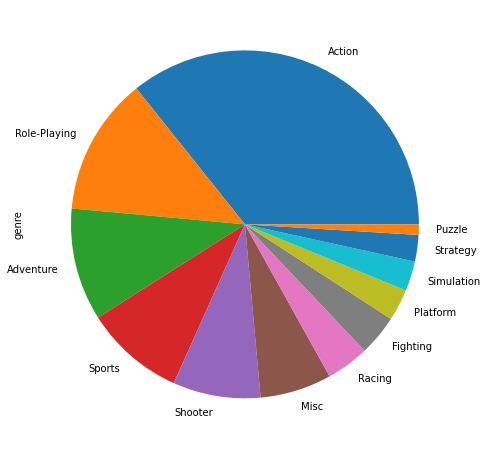

In [51]:
#По жанрам
data_temp  = data_actual['genre'].value_counts()
print(data_temp.head(5))
data_temp.plot(kind='pie', figsize=(8, 8), legend=False)

In [52]:
# Экшен вне конкуренции, ролевые на втром месте и замыкает лидеров группа - приключения, спорт и шутеры. 

<AxesSubplot:xlabel='genre'>

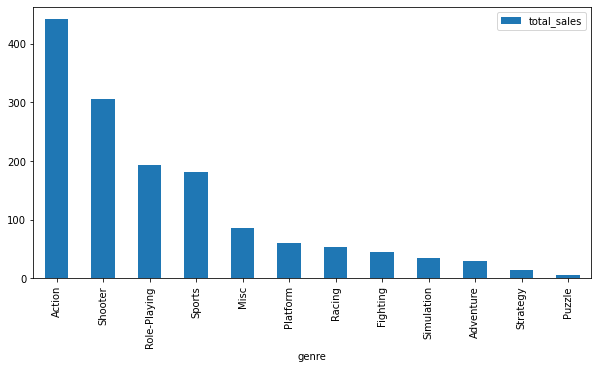

In [53]:

data_genre= data_actual.pivot_table(index='genre', aggfunc={'total_sales':sum})
data_genre = data_genre.sort_values(by='total_sales', ascending=False)
data_genre.plot(y='total_sales', kind='bar', figsize=(10, 5))

In [54]:
# А вот тут сюрприз. Экшен самый профитный,но второе место -  спортивные. Неожиданно. Шутеры на 3-м.

По региону NA (Северная Америка)

          na_sales
platform          
X360        140.05
PS4         108.74
PS3         103.38
XOne         93.12
3DS          55.31


<AxesSubplot:xlabel='genre'>

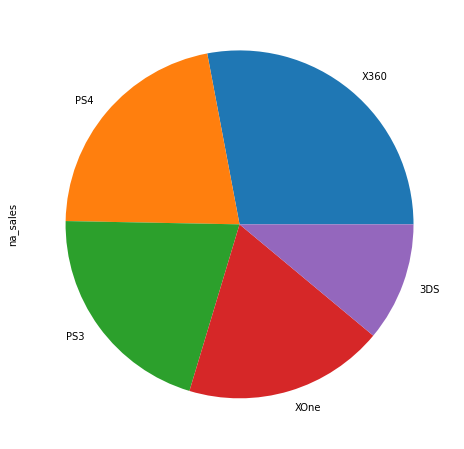

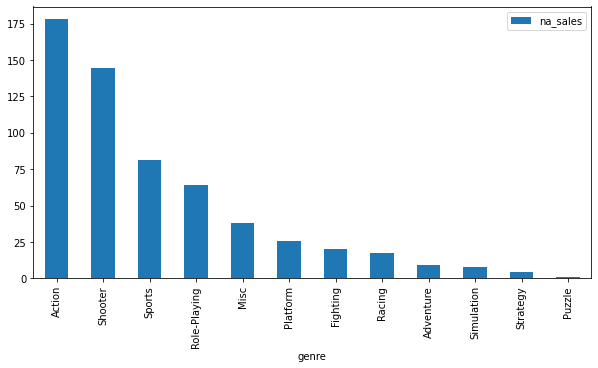

In [55]:
data_TOP_5_platform = data_NA_EU_JP.pivot_table(index = ['platform'], aggfunc={'na_sales':sum}).nlargest(5, columns='na_sales')
print(data_TOP_5_platform)
data_TOP_5_platform['na_sales'].plot(kind='pie', figsize=(8, 8), legend=False)

data_genre= data_actual.pivot_table(index='genre', aggfunc={'na_sales':sum})
data_genre = data_genre.sort_values(by='na_sales', ascending=False)
data_genre.plot(y='na_sales', kind='bar', figsize=(10, 5))

по NA_sales без аномалий

По региону Европа

          eu_sales
platform          
PS4         141.09
PS3         106.86
X360         74.52
XOne         51.59
3DS          42.64


<AxesSubplot:xlabel='genre'>

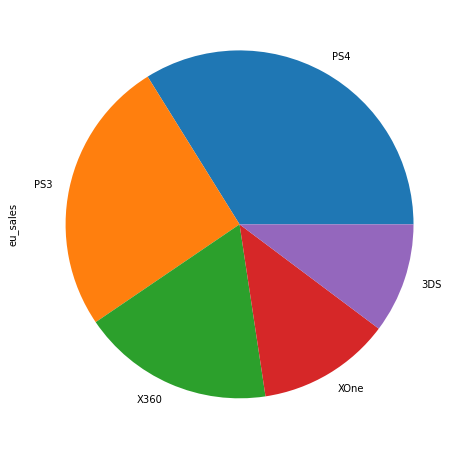

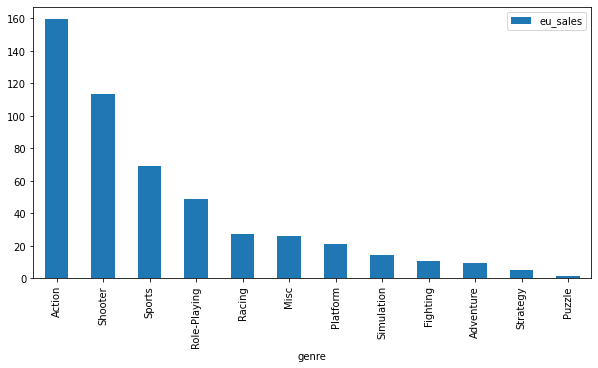

In [56]:

data_TOP_5_platform = data_NA_EU_JP.pivot_table(index = ['platform'], aggfunc={'eu_sales':sum}).nlargest(5, columns='eu_sales')
print(data_TOP_5_platform)
data_TOP_5_platform['eu_sales'].plot(kind='pie', figsize=(8, 8), legend=False)

data_genre= data_actual.pivot_table(index='genre', aggfunc={'eu_sales':sum})
data_genre = data_genre.sort_values(by='eu_sales', ascending=False)
data_genre.plot(y='eu_sales', kind='bar', figsize=(10, 5))

по Европе без аномалий

По региону Япония

          jp_sales
platform          
3DS          87.79
PS3          35.29
PSV          21.04
PS4          15.96
WiiU         13.01


<AxesSubplot:xlabel='genre'>

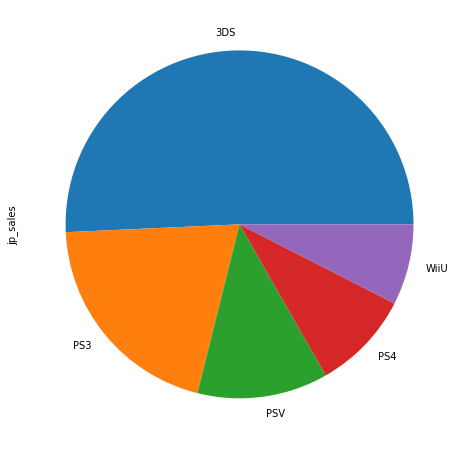

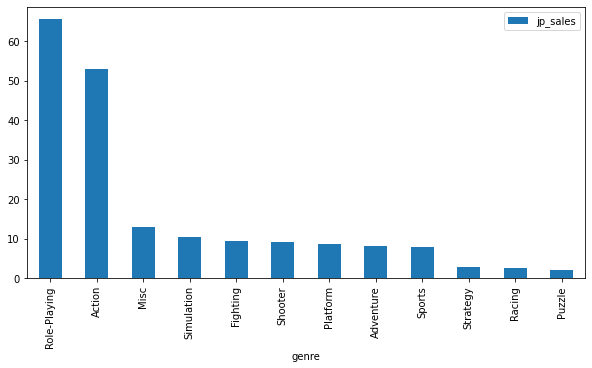

In [57]:

data_TOP_5_platform = data_NA_EU_JP.pivot_table(index = ['platform'], aggfunc={'jp_sales':sum}).nlargest(5, columns='jp_sales')
print(data_TOP_5_platform)
data_TOP_5_platform['jp_sales'].plot(kind='pie', figsize=(8, 8), legend=False)

data_genre= data_actual.pivot_table(index='genre', aggfunc={'jp_sales':sum})
data_genre = data_genre.sort_values(by='jp_sales', ascending=False)
data_genre.plot(y='jp_sales', kind='bar', figsize=(10, 5))

А вот тут сюрприз. Платформа 3DC занимает 50% рынка, а первое место - ролевые игры. Восток дело тонкое.

In [58]:
# По региону NA (Северная Америка)
data_TOP_platform_NA = data_NA_EU_JP.pivot_table(index = ['genre'], aggfunc={'na_sales':sum}).sort_values(by = 'na_sales',ascending=False) 
data_TOP_platform_NA_MAX = data_TOP_platform_NA.nlargest(5, columns='na_sales')
data_TOP_platform_lower_NA = data_TOP_platform_NA.query('na_sales<50').sum()
data_TOP_platform_NA_MAX.loc['other'] = {'na_sales':round((data_TOP_platform_lower_NA.loc['na_sales']),2)}
print(data_TOP_platform_NA_MAX)

# По региону EU 
data_TOP_platform_EU = data_NA_EU_JP.pivot_table(index = ['genre'], aggfunc={'eu_sales':sum}).sort_values(by = 'eu_sales',ascending=False) 
data_TOP_platform_EU_MAX = data_TOP_platform_EU.nlargest(5, columns='eu_sales')
data_TOP_platform_lower_EU = data_TOP_platform_EU.query('eu_sales<40').sum()
data_TOP_platform_EU_MAX.loc['other'] = {'eu_sales':round((data_TOP_platform_lower_EU.loc['eu_sales']),2)}
print(data_TOP_platform_EU_MAX)

# По региону JP 
data_TOP_platform_JP = data_NA_EU_JP.pivot_table(index = ['genre'], aggfunc={'jp_sales':sum}).sort_values(by = 'jp_sales',ascending=False) 
data_TOP_platform_JP_MAX = data_TOP_platform_JP.nlargest(5, columns='jp_sales')
#print(data_TOP_platform_JP)
data_TOP_platform_lower_JP = data_TOP_platform_JP.query('jp_sales<11').sum()
data_TOP_platform_JP_MAX.loc['other'] = {'jp_sales':round((data_TOP_platform_lower_JP.loc['jp_sales']),2)}
print(data_TOP_platform_JP_MAX)

              na_sales
genre                 
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
other           122.83
              eu_sales
genre                 
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
other           116.39
              jp_sales
genre                 
Role-Playing     65.44
Action           52.80
Misc             12.86
Simulation       10.41
Fighting          9.44
other            61.48


Популярность игр по жанрам в регионе Северная Америка

<AxesSubplot:title={'center':'North America'}, ylabel='na_sales'>

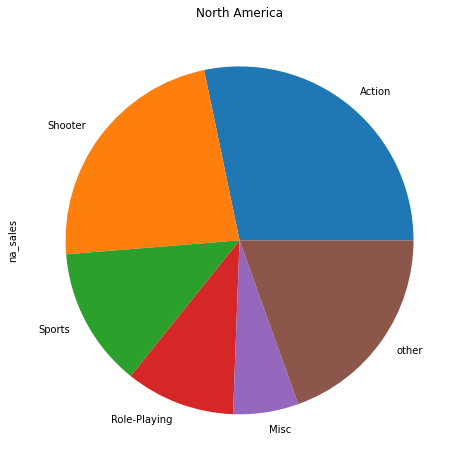

In [59]:
data_TOP_platform_NA_MAX['na_sales'].plot(kind='pie', title = 'North America', figsize=(8, 8), legend=False, stacked=True)


Популярность игр по жанрам в регионе Европа

<AxesSubplot:title={'center':'Europe'}, ylabel='eu_sales'>

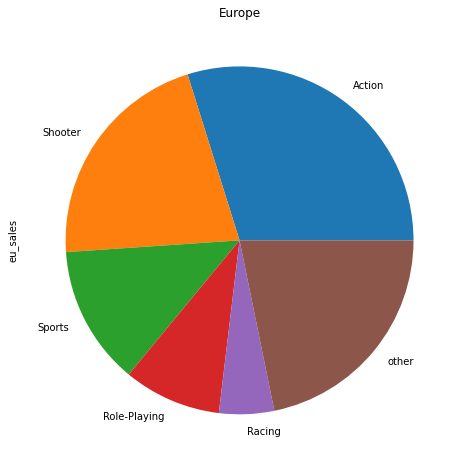

In [60]:

data_TOP_platform_EU_MAX['eu_sales'].plot(kind='pie', title = 'Europe', figsize=(8, 8), legend=False)


Популярность игр по жанрам в регионе Япония

<AxesSubplot:title={'center':'Japan'}, ylabel='jp_sales'>

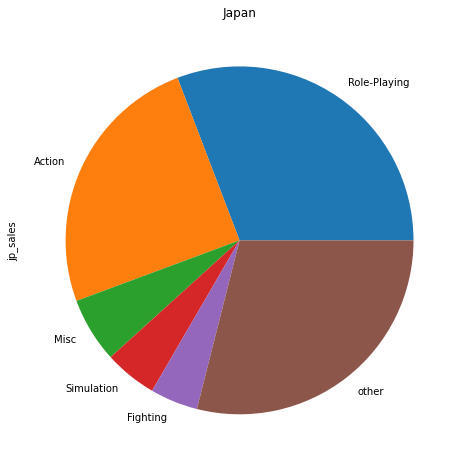

In [61]:
data_TOP_platform_JP_MAX['jp_sales'].plot(kind='pie', title = 'Japan', figsize=(8, 8), legend=False)


          eu_sales  jp_sales  na_sales
rating                                
E           113.03     28.33    114.37
E10+         55.37      8.19     75.70
M           193.96     21.20    231.57
Not data     91.50    108.84    103.31
T            52.96     26.02     66.02


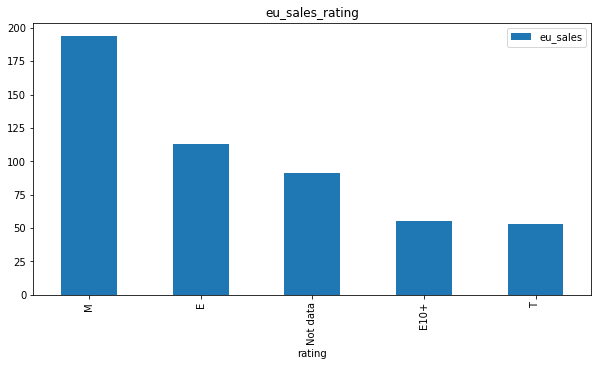

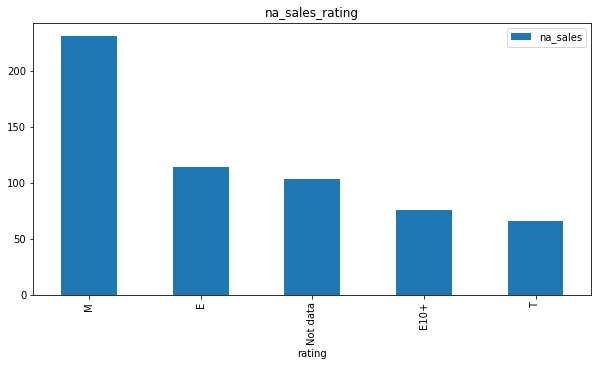

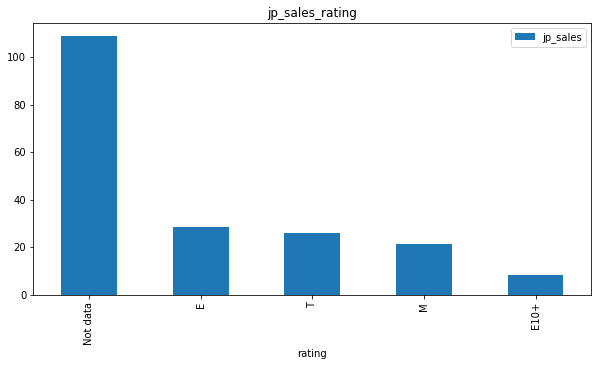

In [62]:
# влияние рейтинга SERB на продажи в отдельном регионе
rating_NA_EU_JP = data_NA_EU_JP.pivot_table(index='rating', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum}) 
region = ['eu_sales', 'na_sales', 'jp_sales']

print(rating_NA_EU_JP)
for i in range(0, 3):  
    temp = rating_NA_EU_JP.sort_values(by=region[i], ascending=False)
    temp.plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i]+'_rating')

In [63]:
# И тут сюрприз. В Европе с СА отзывы имеют значение, в то время как покупатели в Японии к ним равнодушны.

# Шаг 5. Проверка гипотез

In [64]:
# Гипотеза 1. Средние пользовательские рейтинги платформы Xbox One и PC одинаковые


In [65]:
# Сформируем гипотезу
# H0 - средние пользовательские рейтинги платформ Xbox One и PC равны;
# H1 - средний пользовательские рейтинги платформы Xbox One отличается от средних PC.

In [66]:
# удаляем '-5', которыми заменили пропуски, чтобы ен влияли на распреденение
xbox_one_ttest = data_NA_EU_JP[(data_NA_EU_JP['platform']=='XOne')&(data_NA_EU_JP['user_score'] >= 0)]['user_score']
pc_ttest = data_NA_EU_JP[(data_NA_EU_JP['platform']=='PC')&(data_NA_EU_JP['user_score'] >= 0)]['user_score']

# проверим дисперсии рассматриваемых выборок
xbox_one_ttest_var = np.var(xbox_one_ttest, ddof=1)
pc_ttest_var = np.var(pc_ttest, ddof=1)

print('Дисперсия платформы Xbox One:', round(xbox_one_ttest_var, 2))
print()
print('Дисперсия платформы PC:', round(pc_ttest_var, 2))
print()
print('Разница между дисперсиями:',  abs(round(round(xbox_one_ttest_var, 2)- round(pc_ttest_var, 2),2)  ))


Дисперсия платформы Xbox One: 1.91

Дисперсия платформы PC: 2.77

Разница между дисперсиями: 0.86


In [67]:
# Разница между дисперсиями выборок составляет 0.86, что при данном сдучае большая разница
# и считать дисперсии выборок равными нельзя (аргумент equal_var=False)

In [68]:
# уровень значимости 5%
alpha = 0.05

results = st.ttest_ind(xbox_one_ttest, pc_ttest, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [69]:
# р-уровень значимости составил почти 54%, что  выше 5% 
# средний рейтинг пользователей платформ Xbox One и PC одинаков

In [70]:
# Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные

In [71]:
# Сформируем гипотезу
# H0 - Средние пользовательские рейтинги жанров Action и Sports разные;
# H1 - Средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [72]:
# удаляем '-5', которыми заменили пропуски, чтобы ен влияли на распреденение
action_ttest = data_NA_EU_JP[(data_NA_EU_JP['genre']=='Action')&(data_NA_EU_JP['user_score'] >= 0)]['user_score']
sports_ttest = data_NA_EU_JP[(data_NA_EU_JP['genre']=='Sports')&(data_NA_EU_JP['user_score'] >= 0)]['user_score']

# проверим дисперсии рассматриваемых выборок
action_ttest_var = np.var(action_ttest, ddof=1)
sports_ttest_var = np.var(sports_ttest, ddof=1)

print('Дисперсия пользователей Action:', round(action_ttest_var, 2))
print()
print('Дисперсия пользователей Sports:', round(sports_ttest_var, 2))
print()
print('Разница между дисперсиями:',  abs(round(round(action_ttest_var, 2)- round(sports_ttest_var, 2),2)  ))

Дисперсия пользователей Action: 1.89

Дисперсия пользователей Sports: 3.02

Разница между дисперсиями: 1.13


In [73]:
# Разница между дисперсиями выборок составляет 1.13, что при данном случае большая разница
# и считать дисперсии выборок равными нельзя (аргумент equal_var=False)

In [74]:
# уровень значимости 1%
alpha = 0.01

results = st.ttest_ind(action_ttest, sports_ttest, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


In [75]:
# отвергаем нулевую гипотезу. p-уровень значимости слишком мал, гораздо меньше определенного нами порогового значения в 1%, 
# средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются. 
#Любители жанра Action и Sports разные

# Шаг 6. Общий вывод.
1. Средний портрет пользователя в Еврозоне совпадает с Американским, а я Японии особый, отличающийся профиль.
2. Средний срок жизни платформ 7 лет, а платформ лидеров продаж - 10-11лет. 
3. В зоне Северной Америки и Европы виден потенциальный лидер - Sony PS4. А Sony занимает половин рынка. А в Японии половину рынка занимает 3DS.Однако, данные не учитывают инфляцию и я не вносил поправки, так что реультаты могут быть искажены на уровень инфляции при сравнении объема продаж платформ в разные годы существования.
4. Пользователи СА и EU предпочитают экшены, шутеры и спортивные, а пользователи Японии - ролевые и экшены.
5. Пользователят СА и EU важны отзывы, однако пользователи Японии к отзывам равнодушны.
6. Таки образом, в Европе и Северной Америке делаем ставку на тип инг шутеры+ экшн и платформы Sony PS3-PS4, в Японии тип игр ролевые+ экшн и платформа 3DS. 
7. На первом месте тип экшен популярен во всех 3 регионах и можно  смело запускать продвижение таких игр. 
8. Второй по популярности жанг -шутеры в Европе с США, и ролевые для Японии.
9. На третьем месте спортивные в Европе и США.  А вот в Японии нет четкого 3-го места. Все жанры не могут похвастаться большими долями рынка.